In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import config
import time_analysis as ta
import feature_importance as fi

AttributeError: 'DfBankAdditional' object has no attribute 'append'

# Load Data

In [2]:
csv_path = r'./dataset/bank-additional-full.csv'
my_ta = ta.TimeAnalysis(csv_path)
myList, labels = ta.map_age(csv_path)

# Age

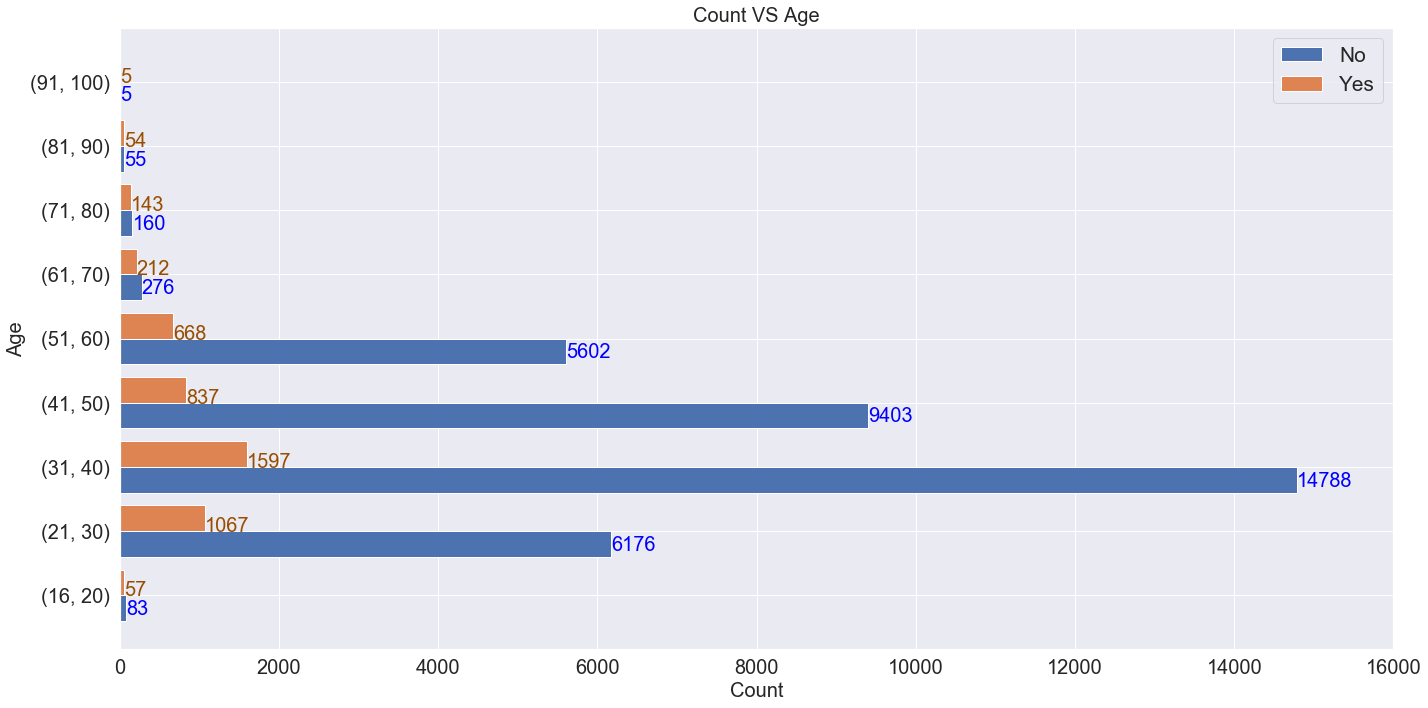

In [3]:
No = [myList[0][0], myList[1][0],myList[2][0], myList[3][0],myList[4][0] ,myList[5][0],myList[6][0], myList[7][0],myList[8][0]]
Yes = [myList[0][1], myList[1][1],myList[2][1], myList[3][1],myList[4][1] ,myList[5][1],myList[6][1], myList[7][1],myList[8][1]]
sns.set(rc={'figure.figsize':(20 ,10)})
x = np.arange(len(labels)) 
width = 0.40  

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2,  No, width, label='No')
rects2 = ax.barh(x + width/2, Yes, width, label='Yes')

ax.set_ylabel('Age', fontsize = 20)
ax.set_xlabel('Count', fontsize = 20)
ax.set_title('Count VS Age', fontsize = 20)

ax.set_xticks(np.arange(0, 17000, step=2000))
plt.tick_params(labelsize=20)
ax.set_yticks(x)
ax.set_yticklabels(labels, fontsize = 20)
ax.legend(fontsize= 'xx-large')

for i, v in enumerate(Yes):
    ax.text(v+0.32,i-0.01, v, color='#994d00', fontsize=20) 
for i, v in enumerate(No):
    ax.text(v+0.17,i-0.3, str(v), color='blue', fontsize=20) 
    
fig.tight_layout()
plt.grid(b=True, which='major', color='#FFFFFF', linestyle='-')
ax.set_facecolor("#EAEAF2")

plt.show()


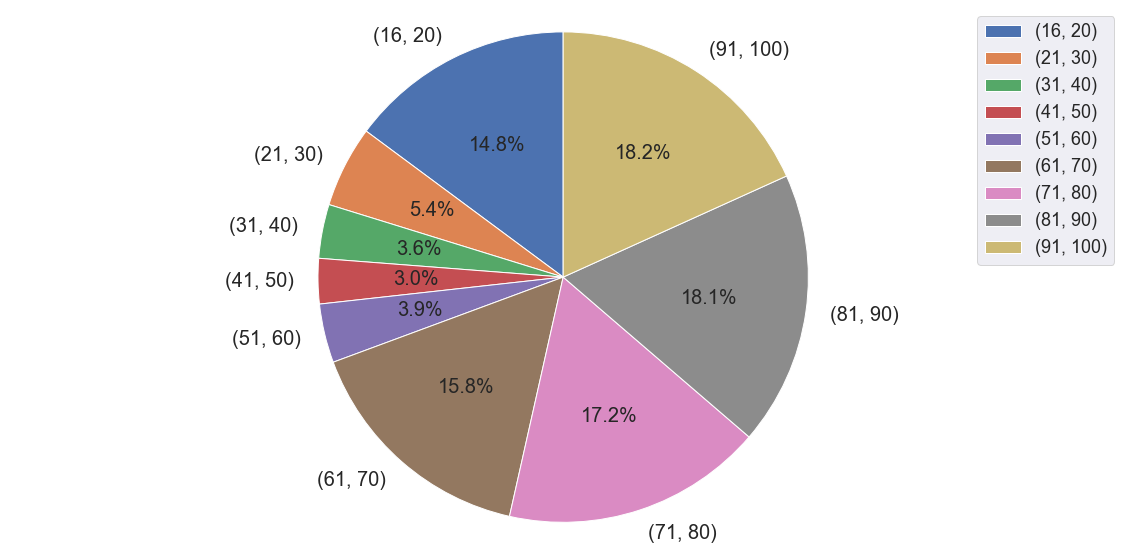

In [4]:
values_prob = ta.get_age_prob_success(myList)
fig1, ax1 = plt.subplots()
ax1.pie(values_prob, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90, textprops={'fontsize': 20})
plt.rcParams['font.size'] = 15.0

ax1.axis('equal')
ax1.legend(fontsize= 'large')

plt.show()

# Day of the week

In [5]:
plt.style.use([{
    "figure.figsize":(20,20),
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
    "legend.fontsize": "x-large",
    "axes.labelsize": "x-large",
    "axes.titlesize": "xx-large",
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn'])

[Text(0, 0.5, 'Probability of Success (%)'), Text(0.5, 0, '')]

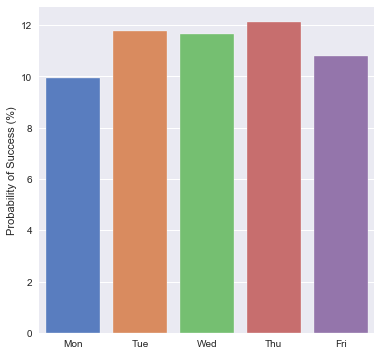

In [6]:
day_of_week_probabilities = my_ta.get_probabilities('day_of_week')

f, ax = plt.subplots(figsize=(6, 6), frameon=False)
sns.barplot(x=ta.number_to_day_of_week(day_of_week_probabilities['day_of_week']),
            y=day_of_week_probabilities['y'] * 100,
            palette='muted')
ax.set(ylabel='Probability of Success (%)', xlabel=None)


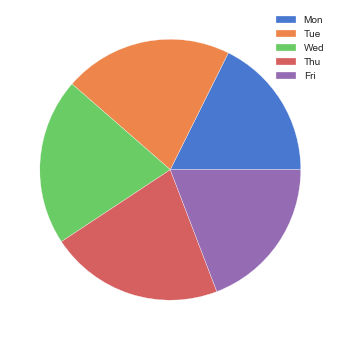

In [7]:
f, ax = plt.subplots(figsize=(6, 6), frameon=False)
day_of_week_relative_probabilities = day_of_week_probabilities
day_of_week_relative_probabilities['y'] = day_of_week_probabilities['y'] / day_of_week_probabilities['y'].sum()
ax.pie(day_of_week_relative_probabilities['y'], colors=sns.color_palette('muted'))
ax.legend(ta.number_to_day_of_week(day_of_week_probabilities['day_of_week']))

[Text(0.5, 0, 'Counts')]

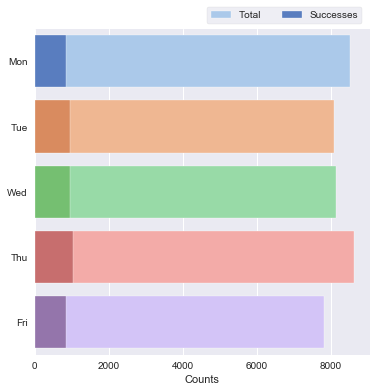

In [8]:
day_of_week_successes = my_ta.get_success_count('day_of_week')
day_of_week_count = my_ta.get_count('day_of_week')

f, ax = plt.subplots(figsize=(6, 6), frameon=False)
sns.barplot(y=ta.number_to_day_of_week(day_of_week_count['day_of_week']),
            x=day_of_week_count['y'],
            palette='pastel',
            label="Total")
sns.barplot(y=ta.number_to_day_of_week(day_of_week_successes['day_of_week']),
            x=day_of_week_successes['y'],
            palette='muted',
            label="Successes")
ax.legend(ncol=2, frameon=True, bbox_to_anchor=(0.5,1,0,0))
ax.set(xlabel='Counts')


[Text(0, 0.5, 'Probability (%)'), Text(0.5, 0, 'Counts')]

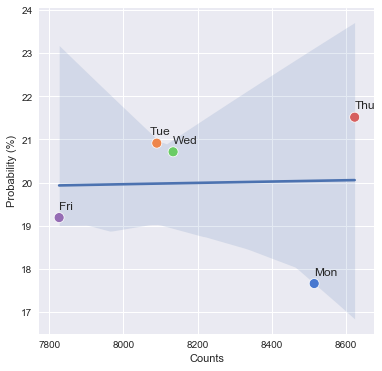

In [9]:
f, ax = plt.subplots(figsize=(6, 6), frameon=False)

day_of_week_pct_probabilities = day_of_week_probabilities['y'] * 100
sns.regplot(x=day_of_week_count['y'], 
            y=day_of_week_pct_probabilities,
            logx=True,
            scatter=False)

sns.scatterplot(x=day_of_week_count['y'], 
                y=day_of_week_pct_probabilities, 
                palette='muted',
                legend=False,
                hue=ta.number_to_day_of_week(day_of_week_count['day_of_week']),
                s=100)

for day, x, y in zip(ta.number_to_day_of_week(day_of_week_count['day_of_week']), day_of_week_count['y'], day_of_week_pct_probabilities):
    if day == 'Tue':
        ax.text(x-20, y+0.2, day, fontsize=12)        
    else:
        ax.text(x, y+0.2, day, fontsize=12)
        
ax.set(ylabel='Probability (%)',
       xlabel='Counts')


# Month

[Text(0.5, 0, 'Probability of Success (%)')]

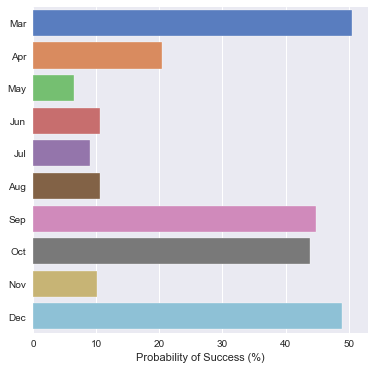

In [10]:
month_probabilities = my_ta.get_probabilities('month')

f, ax = plt.subplots(figsize=(6, 6), frameon=False)
sns.barplot(y=ta.number_to_month(month_probabilities['month']),
            x=month_probabilities['y'] * 100,
            palette='muted')
ax.set(xlabel='Probability of Success (%)',)



/Users/sepehr/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


[Text(0.5, 0, 'Counts')]

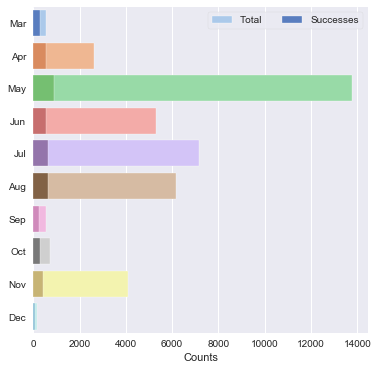

In [11]:
month_successes = my_ta.get_success_count('month')
month_count = my_ta.get_count('month')

f, ax = plt.subplots(figsize=(6, 6), frameon=False)
sns.barplot(y=ta.number_to_month(month_count['month']),
            x=month_count['y'],
            palette='pastel',
            label="Total")
sns.barplot(y=ta.number_to_month(month_successes['month']),
            x=month_successes['y'],
            palette='muted',
            label="Successes")
ax.legend(ncol=2, loc="top right", frameon=True)
ax.set(xlabel='Counts')

[Text(0, 0.5, 'Probability (%)'), (0, 15000), Text(0.5, 0, 'Count')]

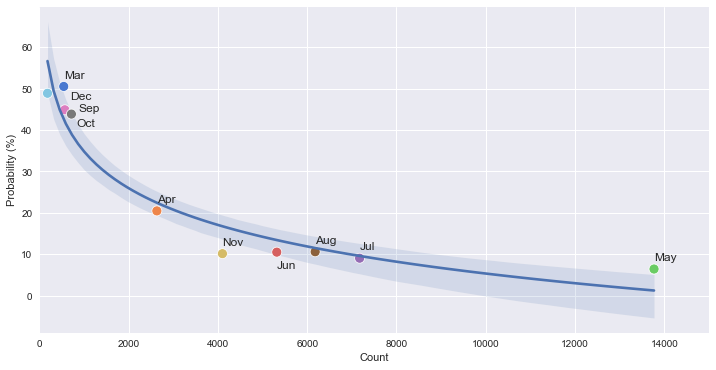

In [12]:
month_pct_probabilities = month_probabilities['y'] * 100

f, ax = plt.subplots(figsize=(12, 6), frameon=False)
sns.regplot(x=month_count['y'], 
            y=month_pct_probabilities,
            logx=True,
            scatter=False)
            
sns.scatterplot(x=month_count['y'], 
                y=month_pct_probabilities, 
                palette='muted',
                hue=ta.number_to_month(month_count['month']),
                legend=False,
                s=100)

for month, x, y in zip(ta.number_to_month(month_count['month']), month_count['y'], month_pct_probabilities):
    if month == 'Oct':
        ax.text(x+100, y-3, month, fontsize=12)
    elif month == 'Sep':
        ax.text(x+300, y-0.5, month, fontsize=12)
    elif month == 'Dec':
        ax.text(x+500, y-1.5, month, fontsize=12)
    elif month == 'Jun':
        ax.text(x, y-4, month, fontsize=12)
    else:
        ax.text(x, y+2, month, fontsize=12)

ax.set(ylabel='Probability (%)',
       xlabel='Count',
       xlim=[0, 15000])


In [13]:
month_filter = month_count['y'] > 1000

[Text(0, 0.5, 'Probability of Success (%)'), Text(0.5, 0, '')]

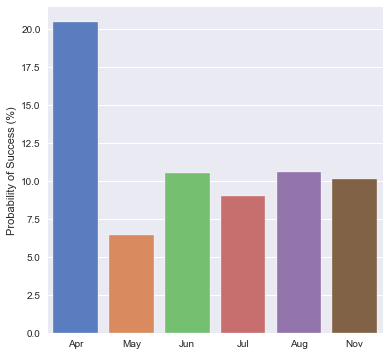

In [14]:
month_probabilities_filtered = month_probabilities[month_filter]

f, ax = plt.subplots(figsize=(6, 6), frameon=False)
sns.barplot(x=ta.number_to_month(month_probabilities_filtered['month']),
            y=month_probabilities_filtered['y'] * 100,
            palette='muted')
ax.set(ylabel='Probability of Success (%)',
       xlabel=None)

/Users/sepehr/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


[Text(0, 0.5, 'Counts')]

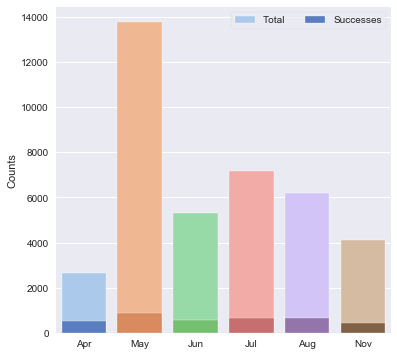

In [15]:
month_successes_filtered = month_successes[month_filter]
month_count_filtered = month_count[month_filter]

f, ax = plt.subplots(figsize=(6, 6), frameon=False)
sns.barplot(x=ta.number_to_month(month_count_filtered['month']),
            y=month_count_filtered['y'],
            palette='pastel',
            label="Total")
sns.barplot(x=ta.number_to_month(month_successes_filtered['month']),
            y=month_successes_filtered['y'],
            palette='muted',
            label="Successes")
ax.legend(ncol=2, loc="top right", frameon=True)
ax.set(ylabel='Counts')